# Análisis del Dataset `movie_data.csv` y Aplicación de Métodos de Aprendizaje No Supervisado

## a) Análisis del Dataset

En esta sección, realizaremos un análisis exploratorio completo del conjunto de datos movie_data.csv. Este análisis incluirá la inspección de las características del dataset, manejo de valores faltantes, análisis de distribuciones de variables, correlaciones y visualizaciones relevantes.

### 1. Carga y Exploración Inicial del Dataset

Primero, importaremos las librerías necesarias y cargaremos el dataset.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos de visualización
sns.set(style="whitegrid")
%matplotlib inline

# Carga del dataset
df = pd.read_csv('movie_data.csv', sep=';')

# Mostrar las primeras filas del dataset
df.head()

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0


### 2. Información General del Dataset

Revisaremos la estructura del dataset, tipos de datos y valores faltantes.

In [36]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5505 entries, 0 to 5504
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5465 non-null   float64
 1   genres                5467 non-null   object 
 2   imdb_id               5460 non-null   object 
 3   original_title        5468 non-null   object 
 4   overview              5460 non-null   object 
 5   popularity            5464 non-null   float64
 6   production_companies  5476 non-null   float64
 7   production_countries  5479 non-null   float64
 8   release_date          5473 non-null   object 
 9   revenue               5473 non-null   float64
 10  runtime               5472 non-null   float64
 11  spoken_languages      5460 non-null   float64
 12  vote_average          5463 non-null   float64
 13  vote_count            5468 non-null   float64
dtypes: float64(9), object(5)
memory usage: 602.2+ KB


**Observaciones:**

- Identificar columnas con valores faltantes.
- Verificar tipos de datos y convertir si es necesario.

In [37]:
# Revisión de valores faltantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

budget                  40
genres                  38
imdb_id                 45
original_title          37
overview                45
popularity              41
production_companies    29
production_countries    26
release_date            32
revenue                 32
runtime                 33
spoken_languages        45
vote_average            42
vote_count              37
dtype: int64

In [38]:
# Calcular la cantidad de filas con al menos un valor faltante
num_missing_rows = df.isnull().any(axis=1).sum()
total_rows = df.shape[0]
print(f"Cantidad de filas con al menos un valor faltante: {num_missing_rows}")
print(f"Total de filas antes de la eliminación: {total_rows}")

Cantidad de filas con al menos un valor faltante: 521
Total de filas antes de la eliminación: 5505


In [39]:
# Eliminar todas las filas que contengan al menos un valor faltante
df = df.dropna()

# Verificar la nueva cantidad de filas
new_total_rows = df.shape[0]
print(f"Total de filas después de la eliminación: {new_total_rows}")


Total de filas después de la eliminación: 4984


In [40]:
# Confirmar que no quedan valores faltantes
print("Valores faltantes después de la limpieza:")
print(df.isnull().sum())

Valores faltantes después de la limpieza:
budget                  0
genres                  0
imdb_id                 0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64


### 3. Estadísticas Descriptivas

Obtendremos estadísticas básicas de las variables numéricas y categóricas.

In [41]:
# Estadísticas descriptivas para variables numéricas
df.describe()

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
count,4.984000e+03,4984.000000,4984.000000,4984.000000,4.984000e+03,4984.000000,4984.00000,4984.000000,4984.000000
mean,3.134135e+07,9.213859,2.916533,1.357745,9.050202e+07,110.310393,1.49057,6.287039,716.598315
std,3.950395e+07,5.944070,2.165965,0.767483,1.585046e+08,21.525882,0.93213,0.899794,1184.934613
min,1.000000e+00,0.003013,0.000000,0.000000,1.001800e+04,26.000000,0.00000,0.000000,0.000000
25%,6.000000e+06,5.668537,1.000000,1.000000,8.035624e+06,96.000000,1.00000,5.700000,85.000000
50%,1.800000e+07,8.486372,2.000000,1.000000,3.103152e+07,106.000000,1.00000,6.300000,287.000000
75%,4.000000e+07,11.777718,4.000000,2.000000,1.022151e+08,120.000000,2.00000,6.900000,792.000000
max,3.800000e+08,54.581997,26.000000,12.000000,2.068224e+09,338.000000,9.00000,9.100000,14075.000000


In [42]:
# Estadísticas descriptivas para variables categóricas
df.describe(include=['object'])

,genres,imdb_id,original_title,overview,release_date
count,4984,4984,4984,4984,4984
unique,20,4742,4671,4741,3494
top,Drama,tt0114709,King Kong,"Led by Woody, Andy's toys live happily in his ...",1995-10-20
freq,1210,2,3,2,7


### 4. Análisis de Variables Individuales

**4.1. Variables Numéricas**

Analizaremos la distribución y posibles outliers de las variables numéricas.

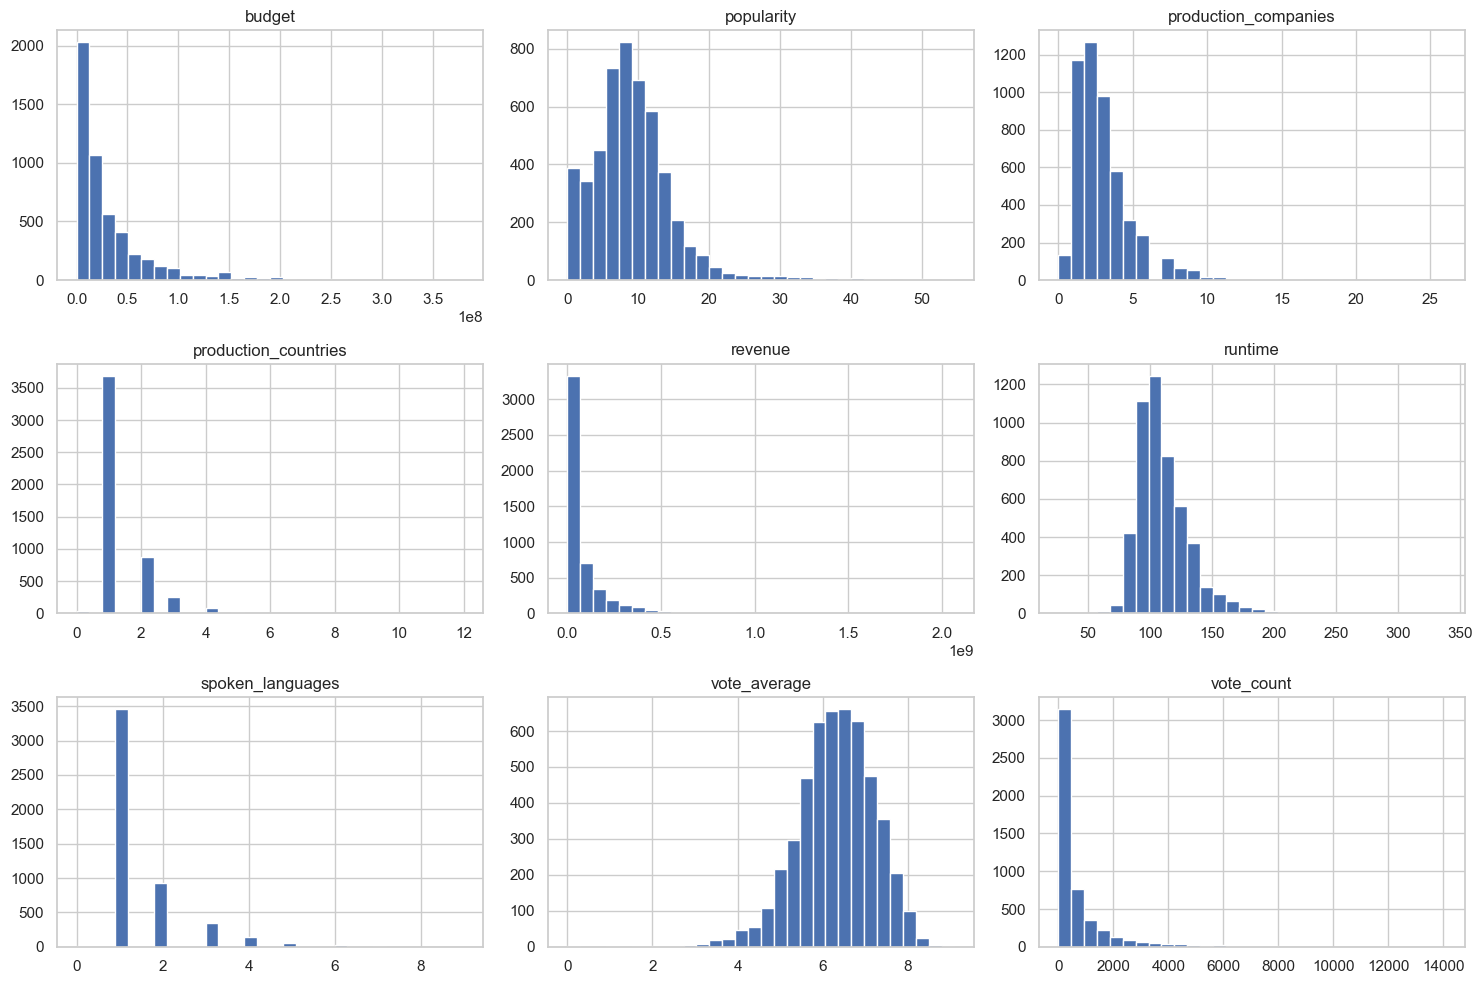

In [43]:
# Lista de variables numéricas
numerical_cols = ['budget', 'popularity', 'production_companies',
                  'production_countries', 'revenue', 'runtime',
                  'spoken_languages', 'vote_average', 'vote_count']

# Histograma de variables numéricas
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

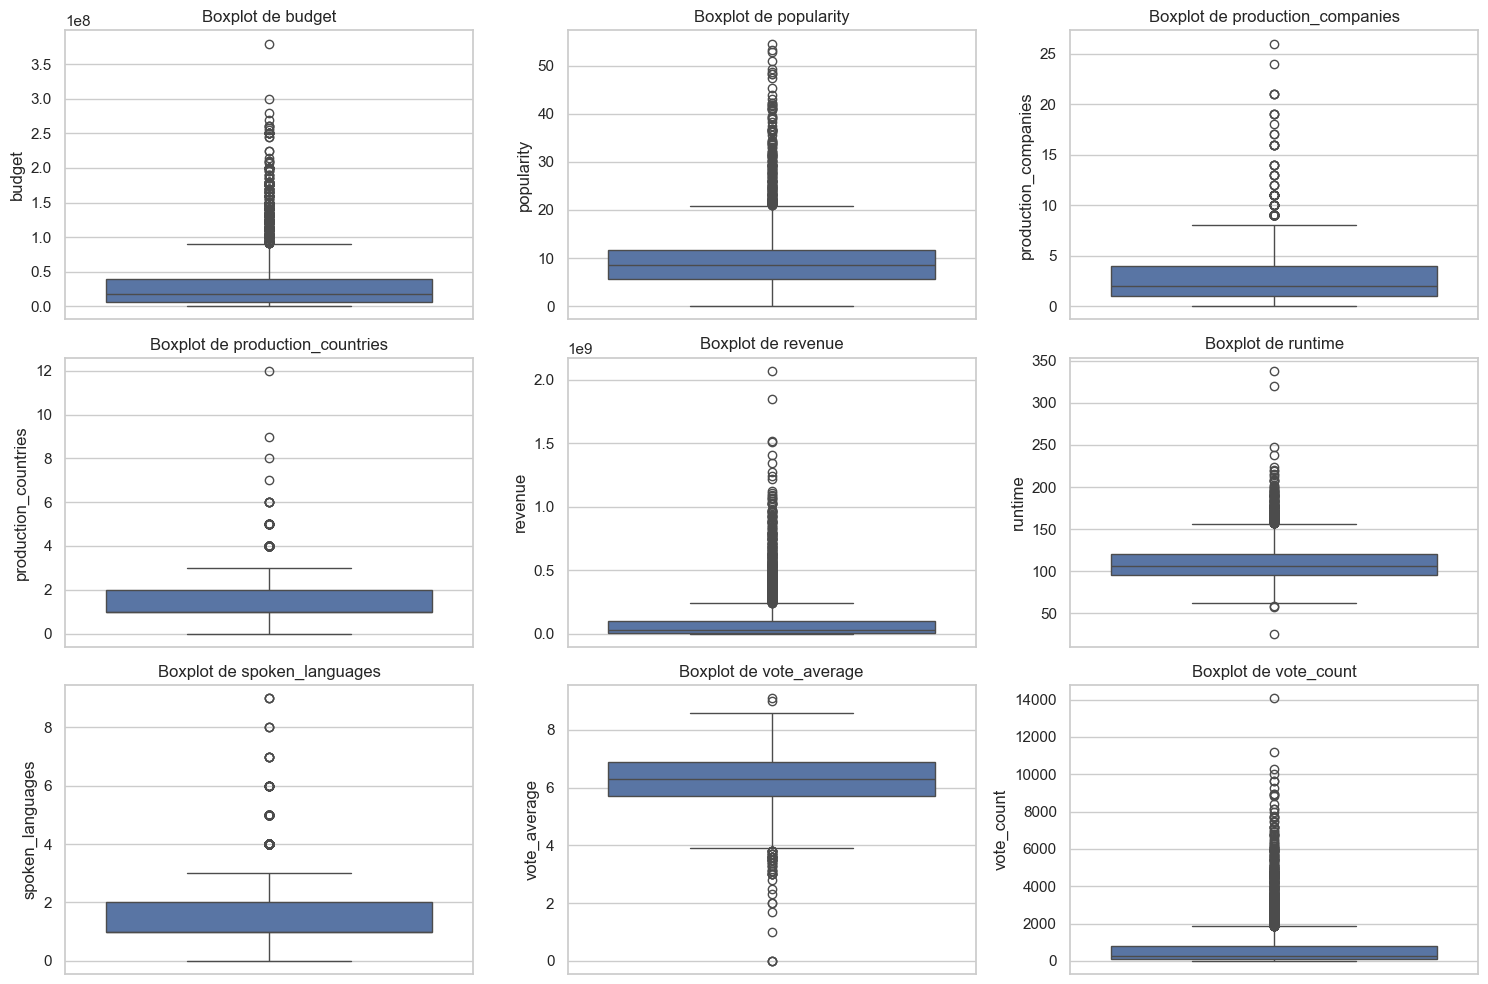

In [44]:
# Boxplots para detectar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

**Observaciones:**

- Identificar variables con distribuciones sesgadas.
- Detectar posibles outliers que puedan afectar los modelos.

**4.2. Variables Categóricas**

Exploraremos la frecuencia de las categorías en variables como `genres` y `release_date`.

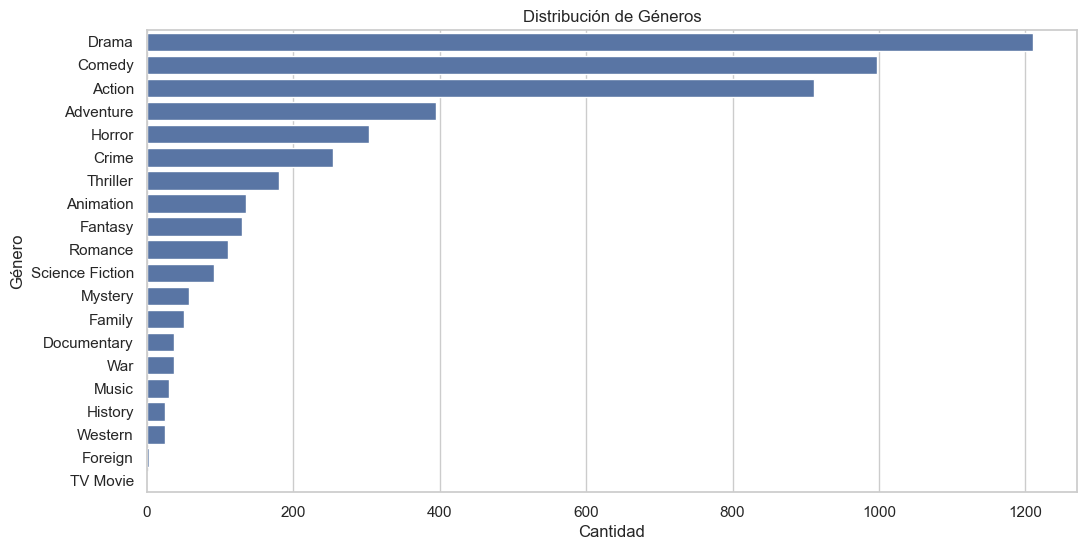

In [45]:
# Análisis de la variable 'genres'
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='genres', order=df['genres'].value_counts().index)
plt.title('Distribución de Géneros')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.show()

In [46]:
# Convertir 'release_date' a tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

# Extraer el año de lanzamiento
df['release_year'] = df['release_date'].dt.year

# Mostrar las primeras filas para verificar
print("Primeras filas con 'release_year':")
print(df[['release_date', 'release_year']].head())

Primeras filas con 'release_year':
  release_date  release_year
0   1995-10-30          1995
1   1995-12-15          1995
2   1995-12-22          1995
3   1995-12-15          1995
4   1995-12-22          1995


**Distribución de Películas por Año de Lanzamiento**

Visualizaremos cómo se distribuyen las películas a lo largo de los años.

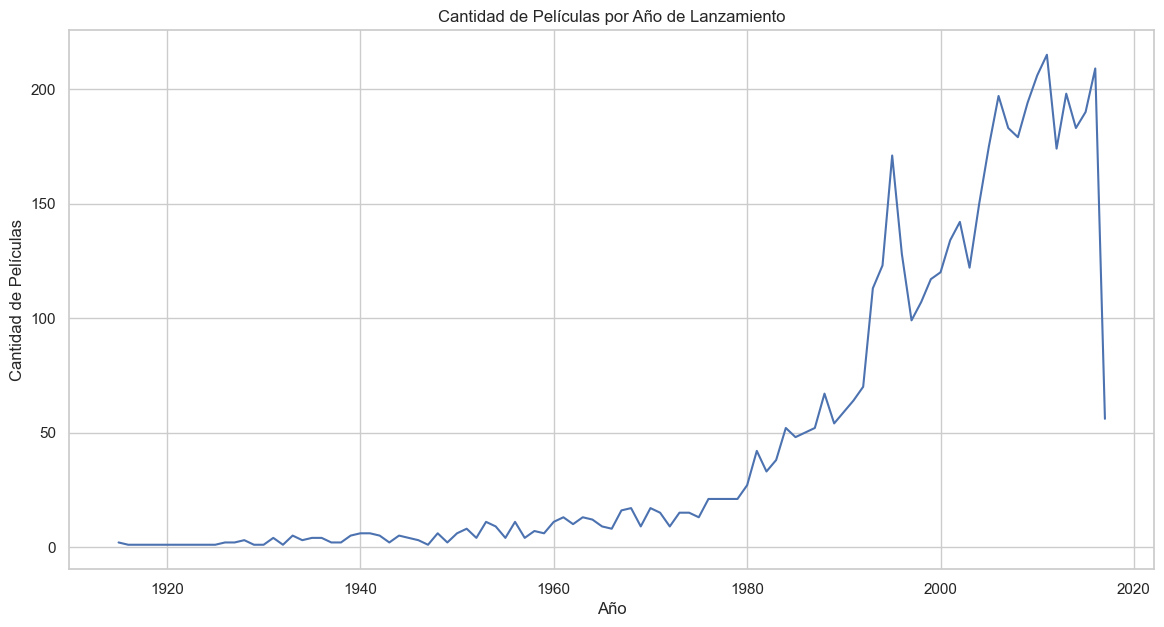

In [47]:
# Contar la cantidad de películas por año
movies_per_year = df['release_year'].value_counts().sort_index()

# Gráfico de la distribución
plt.figure(figsize=(14,7))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Cantidad de Películas por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.show()

**Análisis Adicional para `genres`**

Podemos profundizar en el análisis de `genres` explorando la relación entre géneros y otras variables como el presupuesto o la recaudación.

- Ejemplo: Relación entre Género y Recaudación

C:\Users\Tomas\AppData\Local\Temp\ipykernel_35100\2545677817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_genre.index, y=revenue_by_genre.values, palette='viridis')


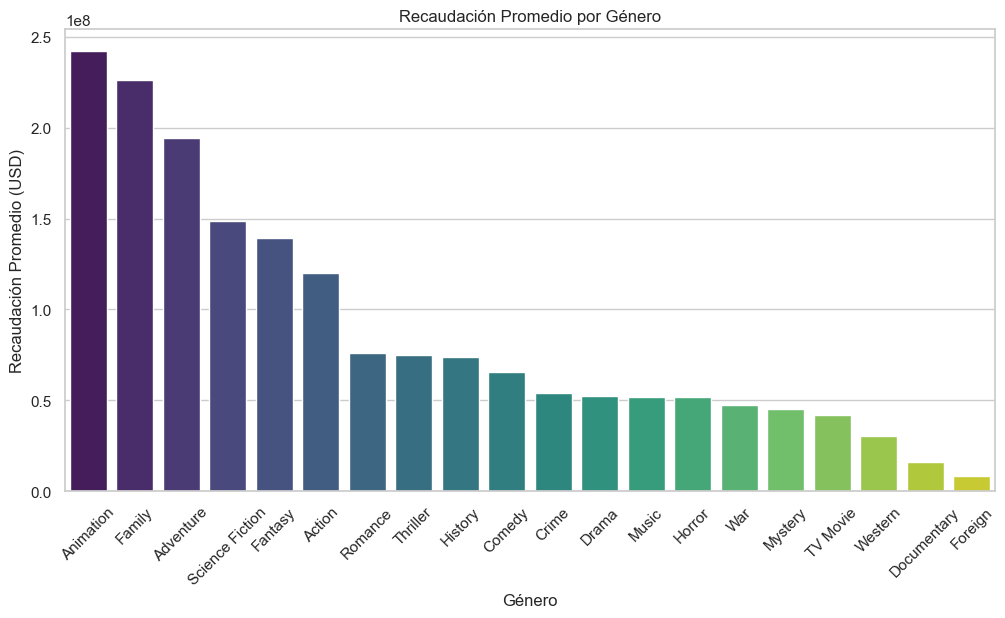

In [48]:
# Agrupar por género y calcular la recaudación promedio
revenue_by_genre = df.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_genre.index, y=revenue_by_genre.values, palette='viridis')
plt.title('Recaudación Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Recaudación Promedio (USD)')
plt.xticks(rotation=45)
plt.show()

**Análisis de la Variable `vote_average` por Género**

Exploraremos cómo varía la votación promedio (`vote_average`) según el género de la película.

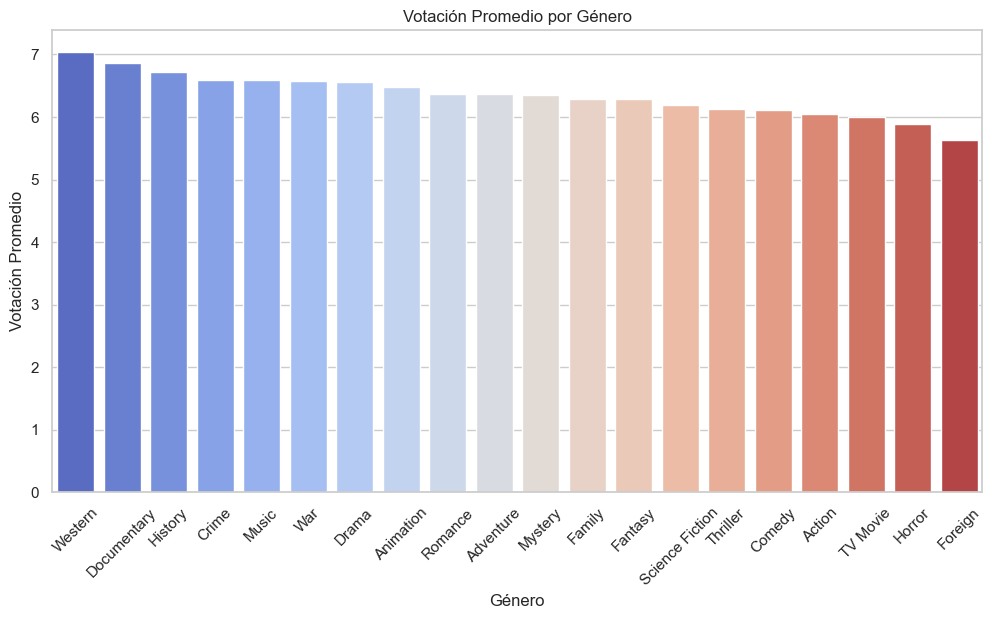

In [51]:
# Agrupar por género y calcular la votación promedio
vote_avg_by_genre = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=vote_avg_by_genre.index, y=vote_avg_by_genre.values, hue=vote_avg_by_genre.index, palette='coolwarm', dodge=False, legend=False)
plt.title('Votación Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Votación Promedio')
plt.xticks(rotation=45)
plt.show()